# Musical Attribute Analysis -  Data Analysis & Visualization 

I will be focusing this analysis to answer the following question: **"What makes up my musical taste?"**

We ended the previous [notebook](https://github.com/sreegp/Musical-Attribute-Analysis/blob/master/Musical%20Attribute%20Analysis%20-%20Data%20Collection%20%26%20Preprocessing.ipynb) with the dataset required for our analysis through data collection and preprocessing. There are 821 songs that I most listen to in this dataset with the following attributes:

Note that the following features are out of scope for this analysis.

- **Play Count (Discrete Variable):** Number of times the song was played

- **Acousticness (Continuous Variable):** A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.

- **Danceability (Continuous Variable):** Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

- **Energy (Continuous Variable):** Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

- **Instrumentalness (Continuous Variable):** Predicts whether a track contains no vocals. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.

- **Key (Discrete Variable):** The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.

- **Liveness (Continuous Variable):** Detects the presence of an audience in the recording. A value above 0.8 provides strong likelihood that the track is live.

- **Loudness (Continuous Variable):** The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Values typical range between -60 and 0 db.

- **Mode (Continuous Variable):** Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- **Speechiness (Continuous Variable):** Speechiness detects the presence of spoken words in a track.

- **Valence (Continuous Variable):** A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- **Popularity (Continuous Variable):** Popularity of the song as defined by Spotify's algorithms which take into account factors like play count over a timeframe (between 0-100)

In [5]:
%matplotlib inline
import pandas as pd 
import numpy as np
from pprint import pprint
import json
import math
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import statistics
import csv

In [3]:
music_data = json.load(open('final_data.json'))
music_data = pd.DataFrame(music_data)

### Sample Song, with Audio Features

In [11]:
music_data.iloc[0] # sample data

acousticness                                                     0.46
album                           Coke Studio India Season 3: Episode 1
album_uri                        spotify:album:2CStgaiOhe1w4OXAoqP1gl
analysis_url        https://api.spotify.com/v1/audio-analysis/0Pua...
artist                                                    A.R. Rahman
artist_uri                      spotify:artist:1mYsTxnqsietFxj1OgoGbG
danceability                                                    0.318
duration_ms                                                    325787
energy                                                          0.508
id                                             0PuaYHseEiuGj3syu49k6G
instrumentalness                                             0.000121
key                                                                 1
liveness                                                        0.106
loudness                                                       -6.067
mode                

## Data Analysis: General Trends

Most of the features are continuous variables between 0 and 1, except play_count and key which are discrete variables. Please refer to the top for more details.

We will start off the analysis by calculating average values for features that are continuous variables and the mode for features that discrete variables. This gives an overview of my music tastes with reference to the features in this analysis. Note that average play_count is not calculated. Play_count is instead used to calculate weighted average values for the features below.

Looking at the average values for the features, we can observe that I enjoy music with moderate levels of acousticness (0.46), dancability (0.53) and energy (0.49), slightly lower than moderate levels of popularity (34.8) and valence (0.4) and low levels of instrumentalness (0.22), liveness (0.12) and speechiness (0.07). Note that all features on mentioned are on a scale between 0 and 1, expect for popularity which is on a scale between 0 and 100.



In [39]:
avg_acousticness = np.average(music_data['acousticness'])
print("avg_acousticness: " + str(avg_acousticness))

avg_danceability  = np.average(music_data['danceability'])
print("avg_danceability: " + str(avg_danceability))

avg_energy   = np.average(music_data['energy'])
print( "avg_energy: " + str(avg_energy))

avg_instrumentalness   = np.average(music_data['instrumentalness'])
print( "avg_instrumentalness: " + str(avg_instrumentalness))

mode_key = statistics.mode(music_data['key'])
print( "mode_key: " + str (mode_key))

avg_liveness = np.average(music_data['liveness'])
print( "avg_liveness: " + str (avg_liveness))

avg_loudness = np.average(music_data['loudness'])
print( "avg_loudness: " + str(avg_loudness))

mode_mode = statistics.mode(music_data['mode'])
print( "mode_mode: " + str(mode_mode))

avg_popularity  = np.average(music_data['popularity'])
print( "avg_popularity:" + str(avg_popularity))

avg_speechiness  = np.average(music_data['speechiness'])
print( "avg_speechiness:" + str(avg_speechiness))

avg_valence  = np.average(music_data['valence'])
print( "avg_valence: " + str(avg_valence))

mode_time_signature = statistics.mode(music_data['time_signature'])
print("mode_time_signature: " + str(mode_time_signature))


avg_acousticness: 0.460103940804
avg_danceability: 0.529243483557
avg_energy: 0.49125952497
avg_instrumentalness: 0.217682307393
mode_key: 0
avg_liveness: 0.162953349574
avg_loudness: -10.5854872107
mode_mode: 1
avg_popularity:34.8428745432
avg_speechiness:0.0681495736906
avg_valence: 0.404420584653
mode_time_signature: 4


## Calculating Weight Averages

While average values of the features provide general information about my musical taste, it is more useful to consider the weighted average, given that I listen to some songs many more times than others. For example, I listened to 'Make You Feel My Love' by Adele 69 times while I listened to 'Under My Skin' by Avril Lavigne twice. If I were to take the average of a feature say acousticness, giving equal weight to both 'Make You Feel My Love'(0.91 acousticness) and 'Under My Skin' (0.0005 acousticness), the analysis could end up showing that I enjoy music with lower values of acousticness than I actually do. 

A better analysis would need to take the play_count into consideration. We can come with a weighted average for each of the features by multiplying the value of the feature for each song with the song's play count, adding up the values for the feature across each song and dividing the totat amount by total play count. This way we can truly understand what levels of each feature I enjoy. Thus, weighted average of each feature will be a better indicator of my musical taste as compared to average.

Based on the weighted average we can observe that I enjoy music with moderate levels of acousticness (0.47), dancability (0.55) and energy (0.49), slightly lower than moderate levels of popularity (40.5) and valence (0.38) and low levels of instrumentalness (0.16), liveness (0.15) and speechiness (0.07). This means I like songs that do not contain instrumental music, are recorded and not live, and do not contain speech-like words. The popularity and tone of the song (happy or sad), which denotes valence do not hugely impact whether or not I enjoy listening to a song. Note that all features on mentioned are on a scale between 0 and 1, expect for popularity which is on a scale between 0 and 100.

Let's now compare the weighted average of the features to the average values. ....

As the weighted average of the features are very close to the average values, regardless of play_count, the songs I listen to are fairly similar. Given that the songs are similar for most of the features regardless of play_count, I decided not to take the approach of clustering the songs into groups and instead proceed with looking into the dispersion of data for each feature.

In [79]:
music_data['weighted_acousticness'] = music_data['acousticness']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_acousticness:" + str(np.sum(music_data['weighted_acousticness'])))

music_data['weighted_danceability'] = music_data['danceability']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_danceability:" + str(np.sum(music_data['weighted_danceability'])))

music_data['weighted_energy'] = music_data['energy']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_energy:" + str(np.sum(music_data['weighted_energy'])))

music_data['weighted_instrumentalness'] = music_data['instrumentalness']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_instrumentalness:" + str(np.sum(music_data['weighted_instrumentalness'])))

music_data['weighted_liveness'] = music_data['liveness']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_liveness:" + str(np.sum(music_data['weighted_liveness'])))

music_data['weighted_loudness'] = music_data['loudness']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_loudness:" + str(np.sum(music_data['weighted_loudness'])))

music_data['weighted_popularity'] = music_data['popularity']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_popularity:" + str(np.sum(music_data['weighted_popularity'])))

music_data['weighted_speechiness'] = music_data['speechiness']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_speechiness:" + str(np.sum(music_data['weighted_speechiness'])))

music_data['weighted_valence'] = music_data['valence']*music_data['play_count']/np.sum(music_data['play_count'])
print( "weighted_valence:" + str(np.sum(music_data['weighted_valence'])))


weighted_acousticness:0.471437827321
weighted_danceability:0.547170156668
weighted_energy:0.492434431601
weighted_instrumentalness:0.15793920402
weighted_liveness:0.154362504776
weighted_loudness:-9.57520137562
weighted_popularity:40.4632212457
weighted_speechiness:0.0712334925487
weighted_valence:0.380050888422


In [37]:
np.sum(music_data['weighted_acousticness'])

0.4714378273213603

## Key Take Aways
The analysis shows that X% of my songs contains instrumental music, Y % of my songs contain live music, % of my songs contain loud music, % of my sounds contain speech and % of my songs are happy songs. Most of the songs are in the XX key, in a major ___ and have a time signature of 4 beats per bar. This means that I like songs that are vocal, recorded, loud, non-speech-like and melodramatic.

### Valence

33 out of 50 songs are below the average valence of 0.4077, median is 0.347, which is lower than the average.. which means that the data is skewed to the left with a long tail of *right* valence songs, with a standard deviation of 0.24909953969447662
 (CHECK LATER)

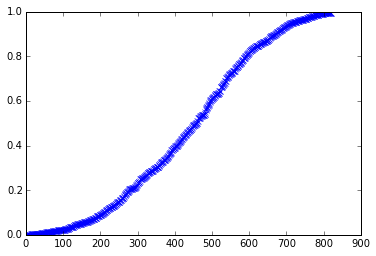

In [88]:
# plt.plot(np.sort(music_data['acousticness']))
# print(np.mean(music_data['acousticness']))
# # plt.plot(pd., np.mean(music_data['acousticness']))

val = np.sort(music_data['acousticness'])  # this is the value where you want the data to appear on the y-axis.
ar = np.arange(len(music_data)) # just as an example array
plt.plot(ar, np.zeros_like(ar) + val, 'x')
plt.show()
 

In [100]:
np.sort(music_data_40['valence'])

array([ 0.0336,  0.0356,  0.057 ,  0.0997,  0.13  ,  0.154 ,  0.167 ,
        0.172 ,  0.194 ,  0.195 ,  0.201 ,  0.211 ,  0.214 ,  0.217 ,
        0.219 ,  0.235 ,  0.277 ,  0.292 ,  0.301 ,  0.313 ,  0.321 ,
        0.327 ,  0.335 ,  0.343 ,  0.346 ,  0.349 ,  0.363 ,  0.369 ,
        0.375 ,  0.376 ,  0.38  ,  0.395 ,  0.396 ,  0.424 ,  0.545 ,
        0.549 ,  0.552 ,  0.553 ,  0.562 ,  0.597 ,  0.666 ,  0.711 ,
        0.719 ,  0.722 ,  0.846 ,  0.849 ,  0.895 ,  0.931 ,  0.933 ,
        0.939 ])

In [108]:
np.median(music_data_40['valence'])

0.34749999999999998

In [112]:
np.std(music_data_40['valence'])

0.24909953969447662

In [114]:
from sklearn.cluster import KMeans 

In [227]:
kmeans = KMeans(n_clusters=3)

In [228]:
X = music_data[['instrumentalness','popularity','tempo', 'speechiness']]

In [229]:
kmeans.fit(X) # fit input data
prediction = kmeans.predict(X) # get labels
print(kmeans.cluster_centers_)
print(prediction)


[[  2.44560088e-01   3.04767442e+01   1.50339702e+02   8.16887597e-02]
 [  3.12035979e-01   1.72452229e+01   9.54092548e+01   6.32324841e-02]
 [  7.08488919e-02   6.15582329e+01   1.08951622e+02   6.03216867e-02]]
[0 1 2 1 1 0 2 2 1 2 2 1 0 2 2 2 1 1 2 2 2 2 2 0 0 2 2 1 2 2 0 2 0 1 2 0 0
 2 1 1 2 2 2 0 2 2 1 1 2 0 0 0 2 1 0 2 2 2 2 2 2 2 0 2 2 2 2 0 0 2 2 2 1 0
 0 2 2 2 2 2 1 0 2 2 2 1 2 1 1 2 1 2 2 0 2 2 0 2 2 2 0 1 2 0 2 0 1 0 2 2 2
 0 0 1 0 1 0 2 1 1 0 0 2 1 0 2 2 1 0 0 2 1 2 1 0 2 2 2 1 0 0 2 0 0 0 2 1 0
 1 2 2 0 1 1 2 1 0 1 1 2 2 2 0 1 2 1 0 1 1 2 1 2 0 1 1 1 2 2 2 0 2 0 0 0 1
 1 0 2 2 1 0 2 0 2 2 1 2 2 0 1 1 2 0 0 0 2 0 2 0 1 1 1 1 1 0 2 2 2 2 2 0 2
 1 2 0 2 0 0 1 1 0 0 2 1 0 1 1 2 1 1 1 2 2 0 0 1 2 2 0 0 0 1 1 1 1 1 1 1 2
 2 2 0 2 2 1 2 2 2 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 0 1 0 2 2 0 0 2 1 1 2 2 0
 0 2 0 1 2 1 2 0 1 1 0 1 1 2 0 1 1 0 0 0 1 1 0 1 0 2 2 2 1 2 1 1 1 0 1 0 2
 1 2 1 1 2 1 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 2 2 0 1 1 1 0 2 2 2 2 0 2 2
 0 2 1 1 1 1 1 1 2 0 1 0 1 1 1 0 0 1

In [230]:
map_prediction_name = pd.DataFrame(music_data['name'])
map_prediction_name['artist'] = music_data['artist']
map_prediction_name['album'] = music_data['album']
map_prediction_name['prediction'] = prediction

In [231]:
map_prediction_name[map_prediction_name['artist'] == '']

,name,artist,album,prediction
2,Daydreamer,Adele,19,2
6,Make You Feel My Love,Adele,19,2
7,Chasing Pavements,Adele,19,2
9,Best For Last,Adele,19,2
10,My Same,Adele,19,2
14,First Love,Adele,19,2
15,Crazy For You,Adele,19,2
19,Melt My Heart To Stone,Adele,19,2
20,Tired,Adele,19,2
25,Cold Shoulder,Adele,19,2


In [207]:
music_data_40['name']

0                             Naan Yen
1                  Vishnu Sahasranamam
2                           Daydreamer
3                            Aao Balma
4                    Ennile Maha Oliyo
5                   Jagaao Mere Des Ko
6                Make You Feel My Love
7                    Chasing Pavements
8                               Zariya
9                        Best For Last
10                             My Same
11                        Nenjae Yezhu
12                        Soz O Salaam
13                       Steal My Girl
14                          First Love
15                       Crazy For You
16                        Aye Sinamika
17                Naetru Aval Irundhal
18       Every Teardrop Is a Waterfall
19              Melt My Heart To Stone
20                               Tired
21                         Amazing Day
22                          Photograph
23                     Mental Manadhil
24                       The Scientist
25                       